# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import balanced_accuracy_1interval_score

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/driver_ratings.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [make_scorer(balanced_accuracy_1interval_score)]

X = pd.read_csv("../assets/data/processed/driver_ratings_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.31152345129617853
              precision    recall  f1-score   support

           1       0.54      0.90      0.68       252
           2       0.60      0.73      0.66       252
           3       0.38      0.50      0.43       252
           4       0.30      0.48      0.37       252
           5       0.28      0.41      0.33       252
           6       0.24      0.36      0.29       252
           7       0.21      0.25      0.23       252
           8       0.28      0.30      0.29       252
           9       0.23      0.27      0.25       252
          10       0.21      0.25      0.23       252
          11       0.30      0.27      0.28       252
          12       0.19      0.26      0.22       252
          13       0.25      0.23      0.24       252
          14       0.35      0.18      0.24       252
          15       0.32      0.23      0.27       252
 

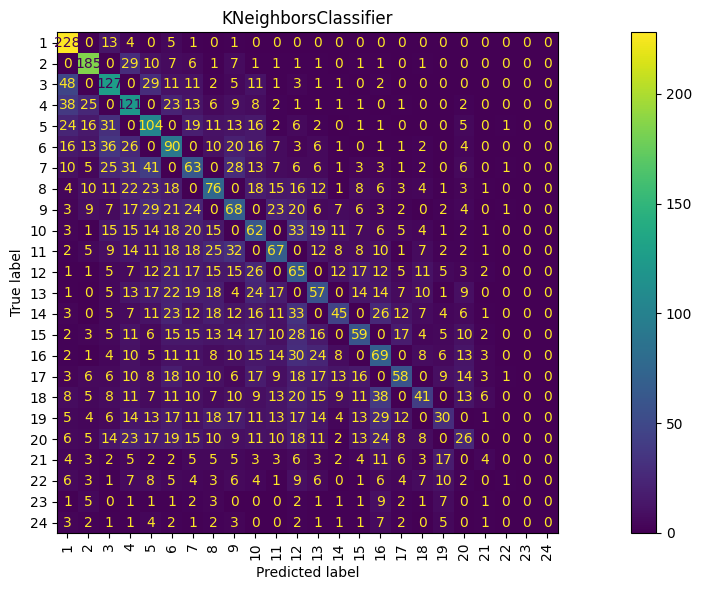

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.2899016240493512
              precision    recall  f1-score   support

           1       0.54      0.84      0.66       252
           2       0.55      0.64      0.59       252
           3       0.37      0.41      0.39       252
           4       0.33      0.32      0.32       252
           5       0.30      0.31      0.31       252
           6       0.21      0.37      0.27       252
           7       0.28      0.41      0.33       252
           8       0.20      0.24      0.22       252
           9       0.24      0.24      0.24       252
          10       0.20      0.24      0.22       252
          11       0.23      0.28      0.25       252
          12       0.20      0.27      0.23       252
          13       0.25      0.25      0.25       252
          14       0.22      0.23      0.22       252
          15       0.32      0.25      0.28       252
  

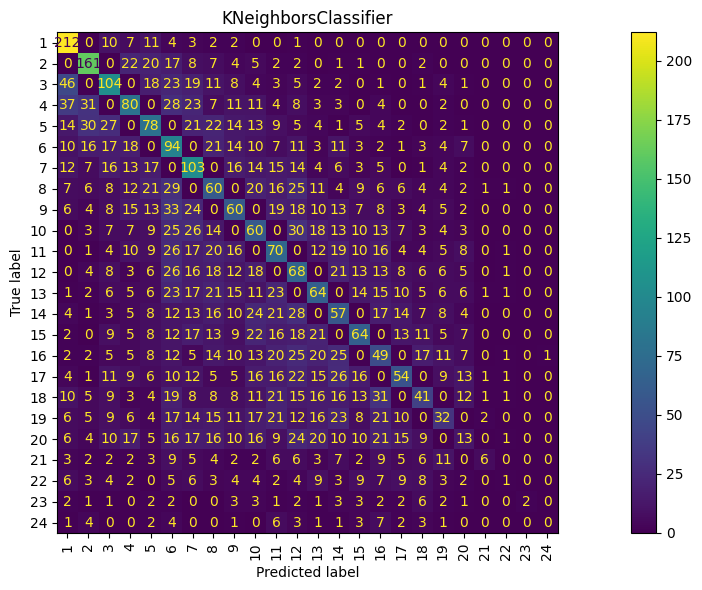

In [4]:
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.34870385086294176
              precision    recall  f1-score   support

           1       0.69      0.85      0.76       252
           2       0.65      0.74      0.69       252
           3       0.49      0.60      0.54       252
           4       0.40      0.55      0.47       252
           5       0.38      0.41      0.39       252
           6       0.45      0.40      0.42       252
           7       0.22      0.35      0.27       252
           8       0.40      0.37      0.38       252
           9       0.17      0.29      0.22       252
          10       0.39      0.32      0.35       252
          11       0.18      0.27      0.22       252
          12       0.23      0.35      0.28       252
          13       0.26      0.15      0.19       252
          14       0.75      0.31      0.43       252
          15       0.17      0.30      0.21       252
          16       0.3

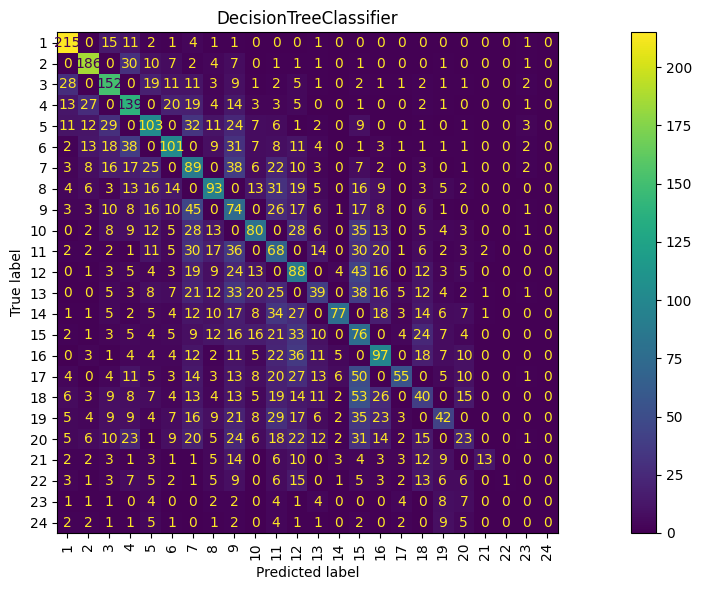

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3373869817051635
              precision    recall  f1-score   support

           1       0.71      0.82      0.76       252
           2       0.57      0.69      0.63       252
           3       0.51      0.62      0.56       252
           4       0.36      0.54      0.43       252
           5       0.40      0.40      0.40       252
           6       0.38      0.38      0.38       252
           7       0.24      0.37      0.29       252
           8       0.37      0.28      0.32       252
           9       0.20      0.25      0.22       252
          10       0.35      0.28      0.31       252
          11       0.22      0.37      0.27       252
          12       0.19      0.42      0.27       252
          13       0.31      0.27      0.29       252
          14       0.38      0.27      0.31       252
          15       0.21      0.21      0.21       252
          16       0.31

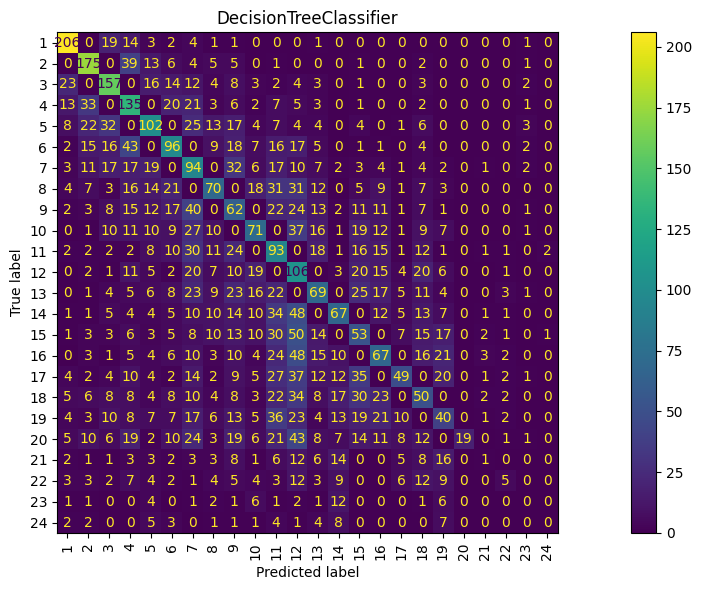

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3449437557392103
              precision    recall  f1-score   support

           1       0.56      0.91      0.70       252
           2       0.63      0.81      0.71       252
           3       0.45      0.63      0.53       252
           4       0.39      0.51      0.44       252
           5       0.41      0.45      0.43       252
           6       0.24      0.42      0.30       252
           7       0.29      0.42      0.34       252
           8       0.35      0.35      0.35       252
           9       0.26      0.24      0.25       252
          10       0.25      0.21      0.23       252
          11       0.23      0.21      0.22       252
          12       0.27      0.29      0.28       252
          13       0.35      0.27      0.30       252
          14       0.25      0.23      0.24       252
          15       0.31      0.25      0.28       252
     

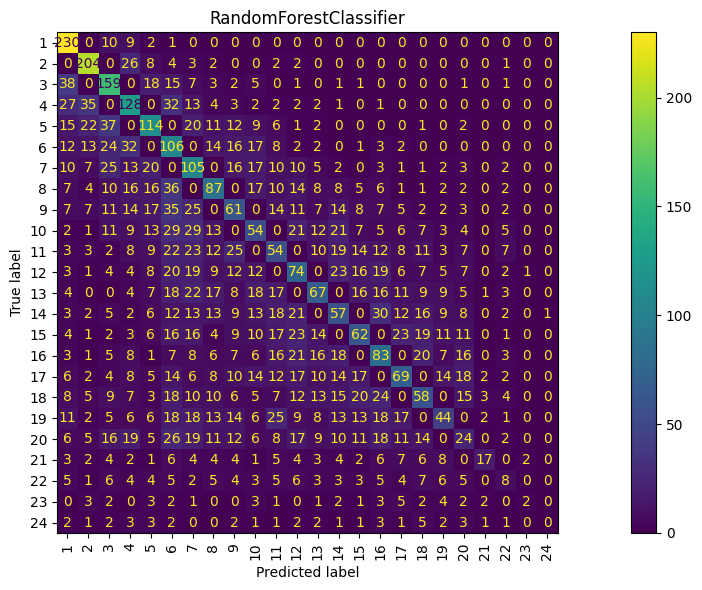

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorNationality",
        "grandPrix",
        "circuitRef",
        "driverWins",
        "constructorWins",
        "q1",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.34747932412705135
              precision    recall  f1-score   support

           1       0.55      0.89      0.68       252
           2       0.58      0.80      0.68       252
           3       0.47      0.64      0.54       252
           4       0.37      0.52      0.43       252
           5       0.40      0.41      0.40       252
           6       0.27      0.42      0.33       252
           7       0.27      0.37      0.31       252
           8       0.40      0.37      0.38       252
           9       0.26      0.26      0.26       252
          10       0.23      0.24      0.24       252
          11       0.25      0.24      0.24       252
          12       0.24      0.28      0.26       252
          13       0.31      0.25      0.28       252
          14       0.26      0.22      0.24       252
          15       0.32      0.25      0.28       252
    

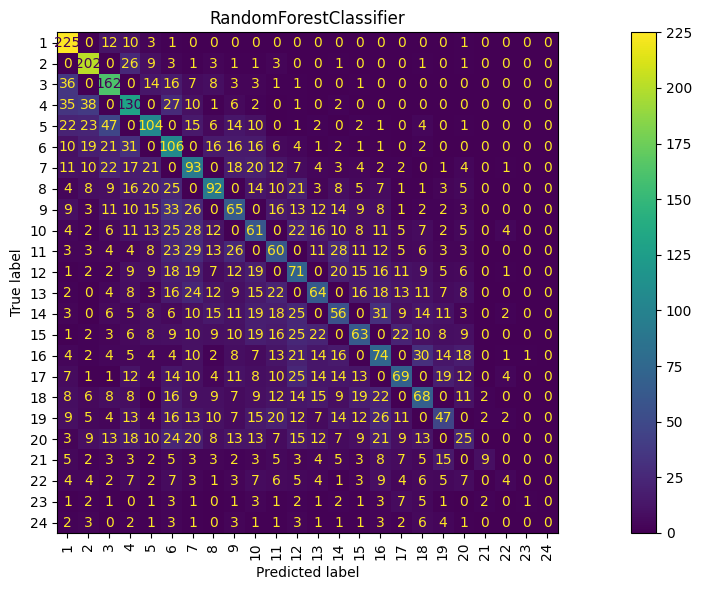

In [8]:
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35970625544489176
              precision    recall  f1-score   support

           1       0.60      0.95      0.73       252
           2       0.62      0.78      0.69       252
           3       0.58      0.57      0.57       252
           4       0.42      0.50      0.46       252
           5       0.36      0.53      0.43       252
           6       0.29      0.48      0.36       252
           7       0.45      0.39      0.42       252
           8       0.26      0.29      0.27       252
           9       0.27      0.30      0.28       252
          10       0.31      0.35      0.33       252
          11       0.19      0.28      0.23       252
          12       0.26      0.31      0.28       252
          13       0.34      0.23      0.28       252
          14       0.49      0.21      0.29       252
          15       0.21      0.27      0.2

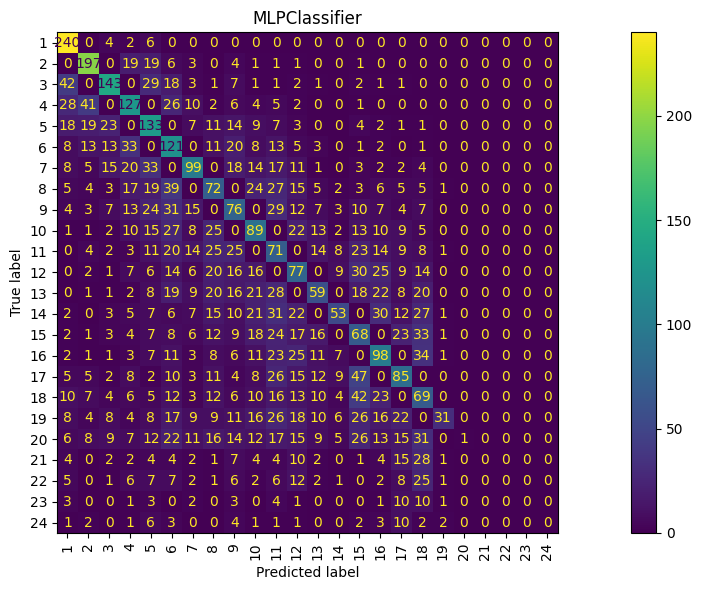

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "circuitRef",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "driverAgeToday",
        "driverAgeAtRace",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.36614182324409605
              precision    recall  f1-score   support

           1       0.64      0.92      0.75       252
           2       0.62      0.75      0.68       252
           3       0.55      0.58      0.57       252
           4       0.44      0.52      0.48       252
           5       0.37      0.51      0.43       252
           6       0.28      0.48      0.35       252
           7       0.38      0.42      0.40       252
           8       0.25      0.26      0.25       252
           9       0.30      0.25      0.27       252
          10       0.27      0.27      0.27       252
          11       0.19      0.31      0.24       252
          12       0.37      0.37      0.37       252
          13       0.20      0.23      0.21       252
          14       0.46      0.29      0.36       252
          15       0.26      0.29      0.2

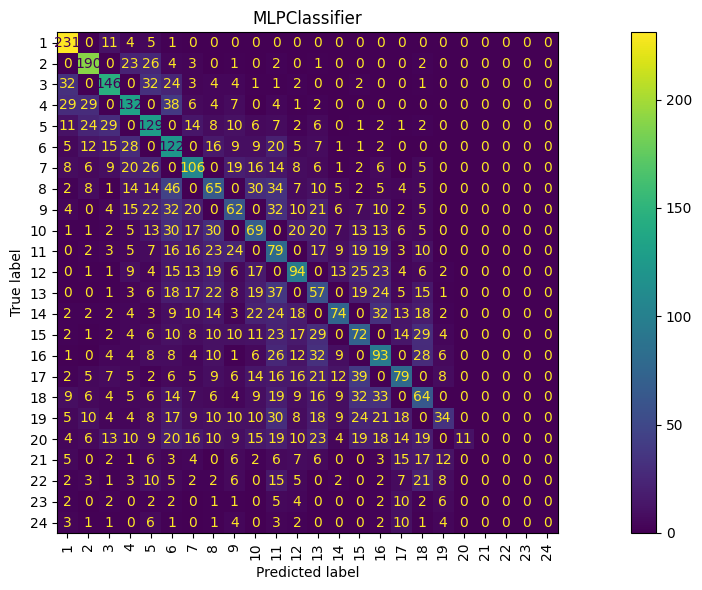

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has not improved.

With all attributes, we have smoothly improved the performance of the model.
